In [2]:
%run ~/dev/pydev/Jupyter/ml/settings.ipynb

Rectifier (lamp function) or activation function

In [3]:
np.random.seed(0)
x = 10*np.random.random((30, 1));
x = x - x.mean(); x = np.sort(x,axis=0)

In [4]:
relu = x * (x > 0)
#relu=np.maximum(x, 0)
#(abs(x) + x) / 2
#relu=np.sort(relu, axis=0)

In [5]:
softplus = np.log(1. + np.exp(x))

In [6]:
def gridset(plt_, ax_):
    plt_.grid(color='gray', linestyle='--', alpha=.3)
    ax_.axhline(0, color='k', lw=1, alpha=0.5)
    ax_.axvline(0, color='k', lw=1, alpha=0.5)
    ax_.legend()

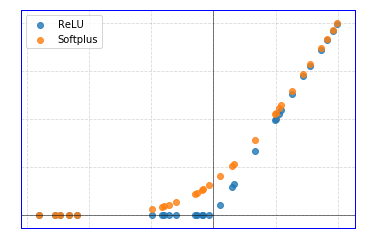

In [8]:
fig, ax = plt.subplots()
plt.scatter(x, relu, alpha=.8,label='ReLU')
plt.scatter(x, softplus, alpha=.8,label='Softplus')
gridset(plt,ax)

parameters (k = 1, x0 = 0, L = 1) 

$S(x)=\frac{e^x}{1-e^x}$

In [18]:
logi = lambda x: 1./(1.+ np.exp(-x))

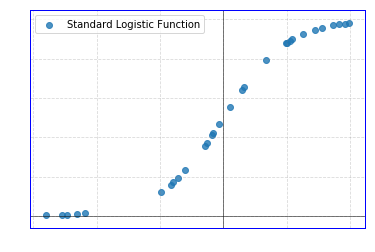

In [19]:
fig, ax = plt.subplots()
plt.scatter(x, logi(x), alpha=.8,label='Standard Logistic Function')
gridset(plt, ax)

$tanh(x) = 2S(2x)-1 \leftrightarrow S(x)= \frac{tanh(\frac{x}{2})}{2}+1$ 

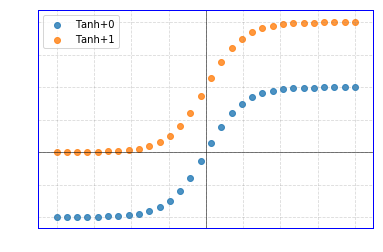

In [27]:
fig, ax = plt.subplots()
tanh_ = lambda x: np.tanh(x)
tanh_2 = lambda x,g: 2*g(2*x)-1 
xx=np.linspace(-4,4, 30)
plt.scatter(xx, tanh_(xx), alpha=.8,label='Tanh+0')
plt.scatter(xx, tanh_2(xx,logi)+1, alpha=.8,label='Tanh+1')
gridset(plt,ax)

A log-likelihood (to be maximized)<br/>
$J(w) = \sum_{i=1}^{m} y^{(i)} \log P(y=1) + (1 - y^{(i)}) \log P(y=0)$<br/>
Loss for Logistic regression<br/>
$-J(w)$

In [9]:
h = np.array([0.0,0.2,0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
            2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50,6.00,6.50]).reshape((-1,1))
r = np.array([0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1]).reshape((-1,1))

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(h, r)
clf.predict(h)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

No handles with labels found to put in legend.


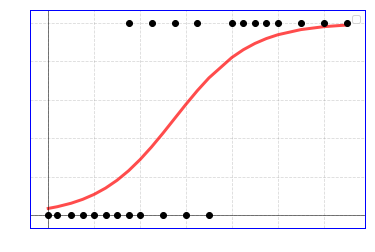

In [11]:
def model(x):
    return 1 / (1 + np.exp(-x))
fig, ax = plt.subplots()
loss = model(h * clf.coef_ + clf.intercept_).ravel()
plt.plot(h, loss, c='r', linewidth=3, alpha=.7)
plt.scatter(h, r, c='k', zorder=20)
gridset(plt, ax)

In [12]:
from mpl_toolkits import mplot3d
def set_3dplt(ax_, plt_):
    plt_.gca().patch.set_facecolor('None')
    ax_.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax_.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax_.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

//anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  s)


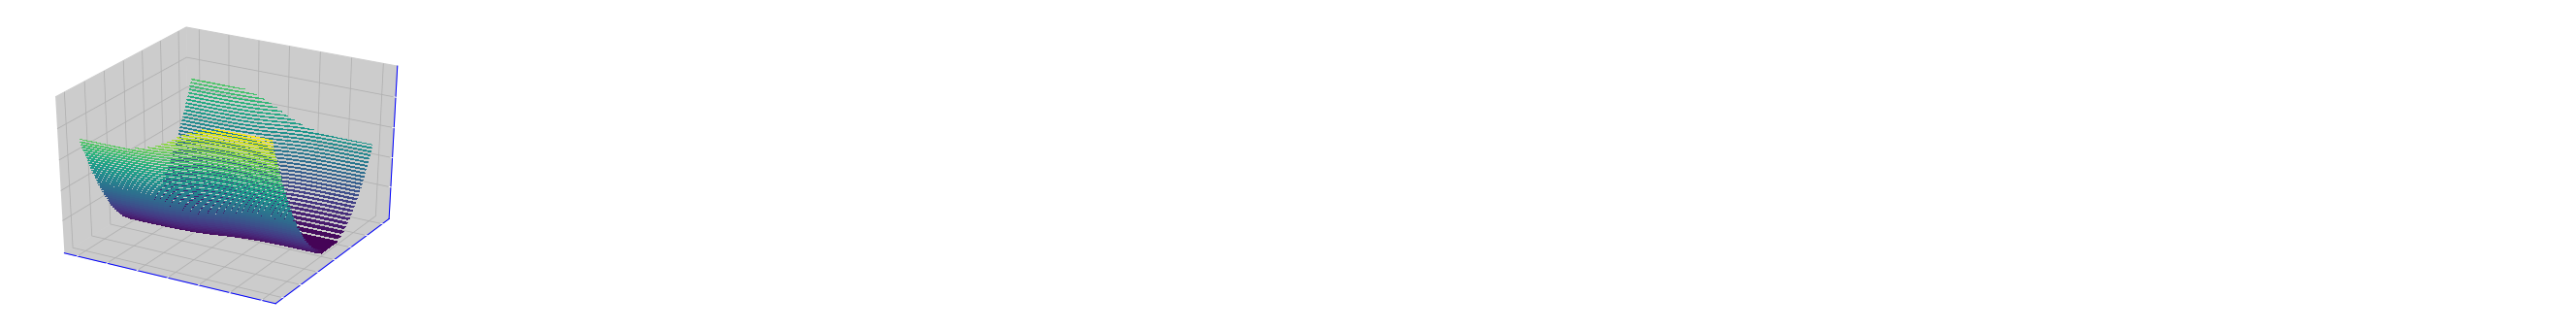

In [13]:
#def f(x, y): return (1./2.)*((1./(1. + np.exp(-x)))- y)**2
def f(x, y):
    return (1./2.)*((1./(1. + np.exp(-x)))- y)**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig, ax = plt.subplots(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.contourf3D(X, Y, Z, 50, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(60, 35)
set_3dplt(ax, plt)

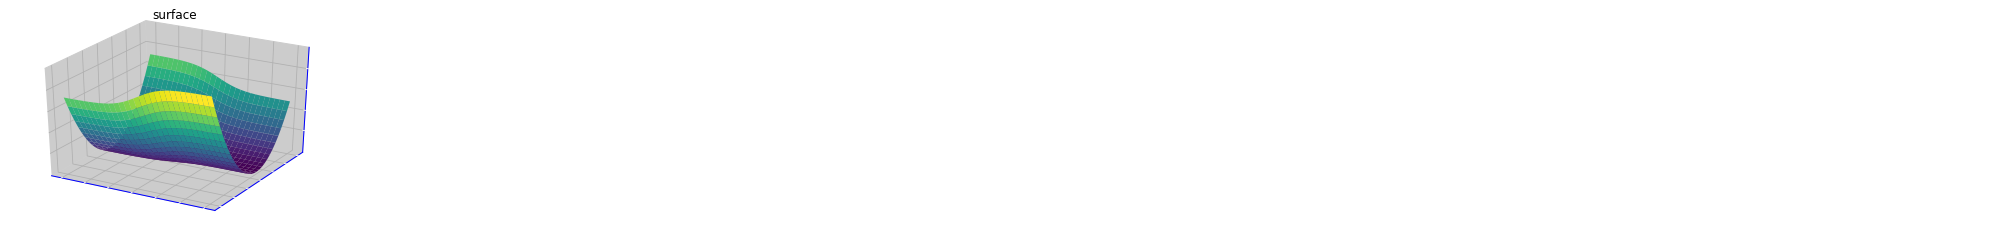

In [14]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')
set_3dplt(ax, plt)

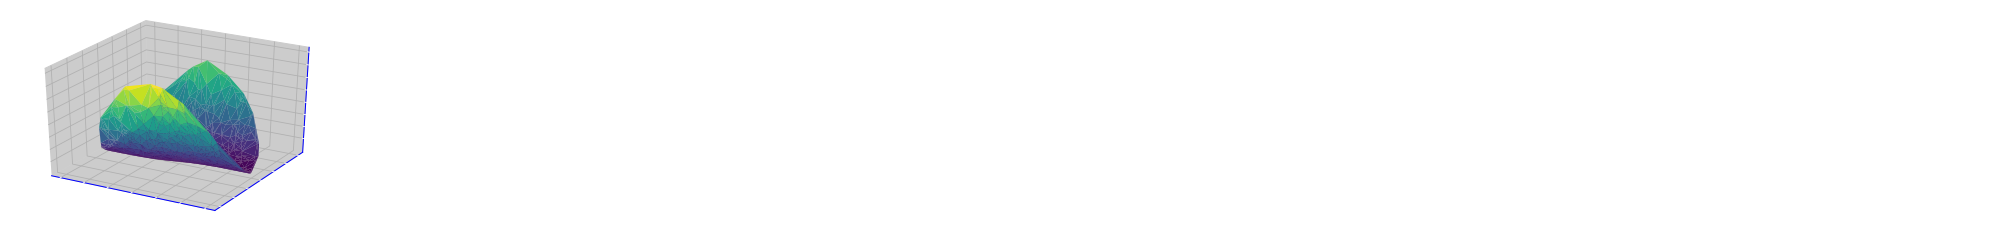

In [15]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')
set_3dplt(ax, plt)

In [16]:
def sigmoid(x, b1, b2):                                                        
    z = (b1*x + b2)   
    s = .001
    return 1. / (1. + np.exp(-z) + s) 

def log_likelihood(x, y, b1, b2):      
    sigmoid_probs = sigmoid(x, b1, b2)      
    l = np.sum(y * np.log(sigmoid_probs) + (1-y) * np.log(1-sigmoid_probs))
    return l 

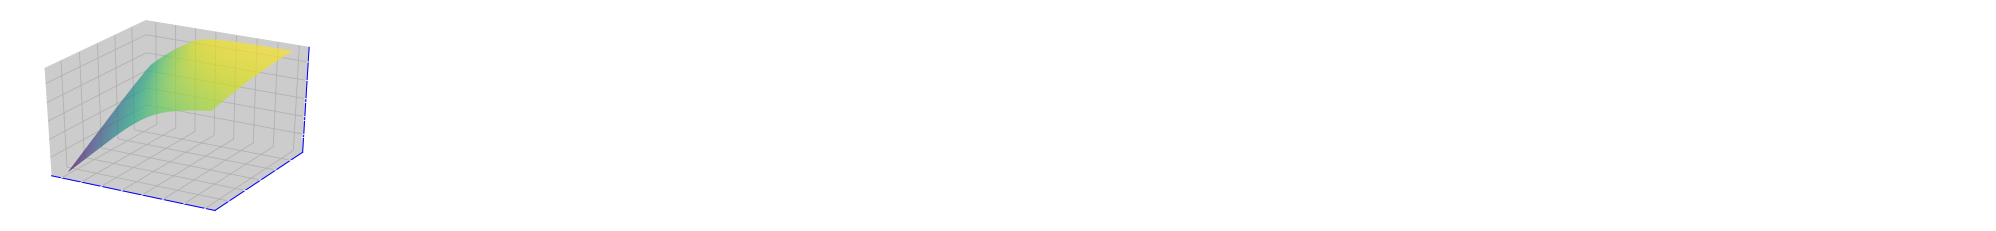

In [17]:
x=h
y=r
b1 = np.arange(-2, 5, .05)
b2 = np.arange(-5, 5, .05)
b1, b2 = np.meshgrid(b1, b2)
#
c = [log_likelihood(x, y, b1_, b2_) 
     for b1_, b2_ in zip (b1.ravel(), b2.ravel())]
c = np.array(c).reshape(-1, 1)
#
ax = plt.axes(projection='3d')
set_plot = dict(rstride = 1, cstride = 1,
                cmap = 'viridis', edgecolor = 'none')
ax.plot_surface(b1, b2, c.reshape(np.array(b1).shape), **set_plot)
set_3dplt(ax, plt)

In [18]:
import ipyvolume.pylab as p3
fig = p3.figure()
pp=p3.plot_surface(b1, b2, c.reshape(np.array(b1).shape), color = 'rgba(255, 0, 0, 0.50)')
p3.style.use("dark")
p3.show()

In [19]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)
ipv.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
//anaconda/lib/python3.5/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


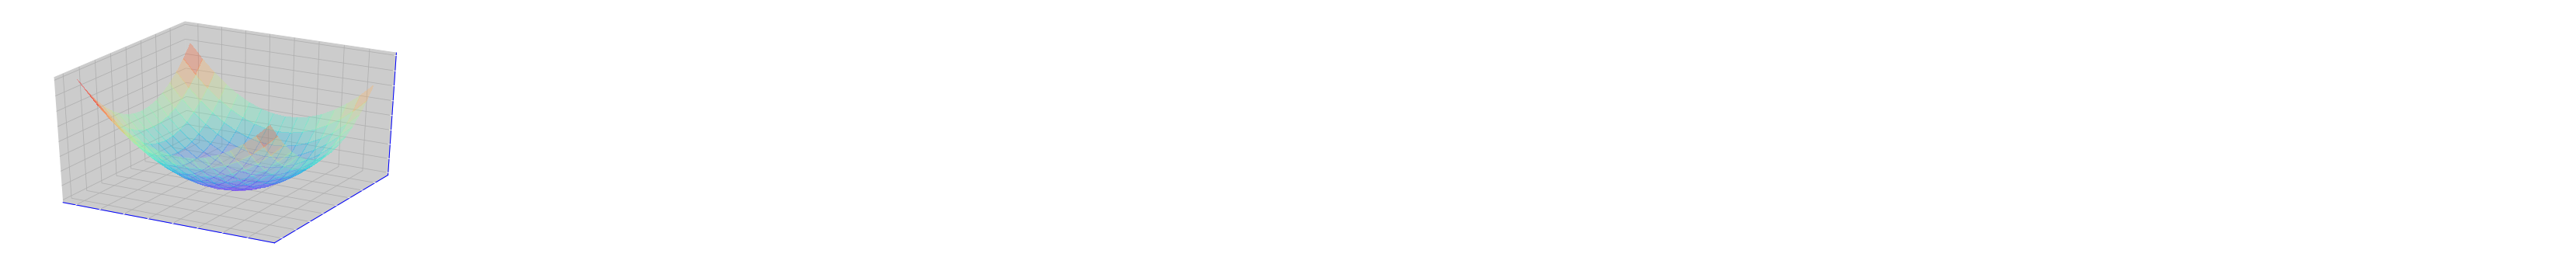

In [20]:
def f(a,b):
    return a**2 + b**2

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False, cmap='rainbow')
ax.set_zlim(-0.01, 8.01)
set_3dplt(ax, plt)

In [21]:
def gradient_descent(theta0, iters, alpha):
    history = [theta0] # to store all thetas
    theta = theta0     # initial values for thetas
    for i in range(iters):
        # gradient is [2x, 2y]:
        gradient = [2.0*x for x in theta] 
        # update parameters:
        theta = [a - alpha*b for a, b in zip(theta, gradient)]
        history.append(theta)
    return history

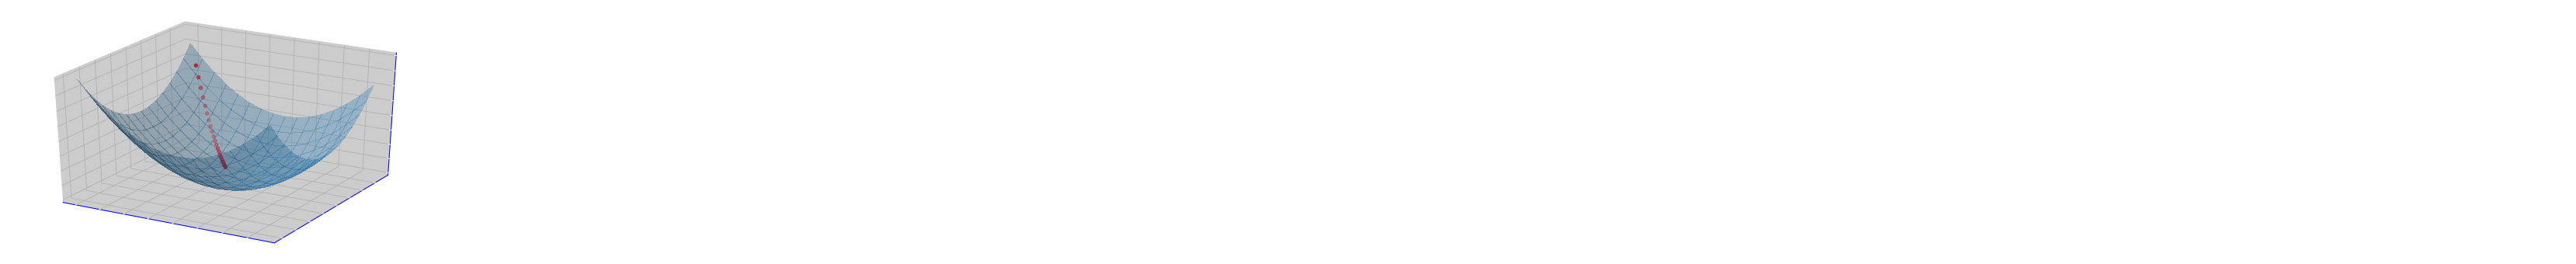

In [22]:
prams = dict(theta0 = [-1.8, 1.6], 
             iters = 20, 
             alpha = 0.03)
history = gradient_descent(**prams)
history = np.array(history)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
ax.set_zlim(-0.01, 8.01)
#
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
set_plt = dict(rstride=1, cstride=1, alpha=0.3, 
               linewidth=0, antialiased=False)
surf = ax.plot_surface(a, b, c, **set_plt)
#
a = history[:,0]
b = history[:,1]
c = f(a,b)
ax.scatter(a, b, c, color="r")
#
set_3dplt(ax, plt)

In [23]:
import statsmodels.discrete.discrete_model as sm

In [24]:
#probit=sm.Probit(r,h).fit(method='newton');probit

In [25]:
"""pred=probit.predict(probit.score, h)
fig, ax = plt.subplots()
plt.scatter(h, pred, alpha=.8)
gridset(plt,ax)"""

'pred=probit.predict(probit.score, h)\nfig, ax = plt.subplots()\nplt.scatter(h, pred, alpha=.8)\ngridset(plt,ax)'

In [26]:
import mord
from mord.datasets.base import load_housing
from sklearn import linear_model, metrics, preprocessing

data = load_housing()
features = data.data

le = preprocessing.LabelEncoder()
le.fit(data.target)
data.target = le.transform(data.target)
list(le.classes_)

//anaconda/lib/python3.5/site-packages/mord/datasets


['High', 'Low', 'Medium']

In [27]:
#print(data.DESCR)

In [28]:
features.loc[features.Infl == 'Low', 'Infl'] = 1
features.loc[features.Infl == 'Medium', 'Infl'] = 2
features.loc[features.Infl == 'High', 'Infl'] = 3

features.loc[features.Cont == 'Low', 'Cont'] = 1
features.loc[features.Cont == 'Medium', 'Cont'] = 2
features.loc[features.Cont == 'High', 'Cont'] = 3

In [29]:
le = preprocessing.LabelEncoder()
le.fit(features.loc[:,'Type'])
features.loc[:,'type_encoded'] = le.transform(features.loc[:,'Type'])

In [30]:
X = features.loc[:,('Infl', 'Cont', 'type_encoded')]
y = data.target

In [31]:
list(le.classes_)

['Apartment', 'Atrium', 'Terrace', 'Tower']

In [32]:
features.loc[features.Type=='Apartment'][:10]

,Infl,Type,Cont,type_encoded
9,1,Apartment,1,0
9,1,Apartment,1,0
9,1,Apartment,1,0
9,1,Apartment,1,0
9,1,Apartment,1,0
9,1,Apartment,1,0
9,1,Apartment,1,0
9,1,Apartment,1,0
9,1,Apartment,1,0
9,1,Apartment,1,0


In [33]:
clf1 = linear_model.LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial')
clf1.fit(X, y)
print('Mean Absolute Error of LogisticRegression: %s' %
      metrics.mean_absolute_error(clf1.predict(X), y))

Mean Absolute Error of LogisticRegression: 0.6805472932778108


In [34]:
clf2 = mord.LogisticAT(alpha=1.)
clf2.fit(X, y)
print('Mean Absolute Error of LogisticAT %s' %
      metrics.mean_absolute_error(clf2.predict(X), y))

clf3 = mord.LogisticIT(alpha=1.)
clf3.fit(X, y)
print('Mean Absolute Error of LogisticIT %s' %
      metrics.mean_absolute_error(clf3.predict(X), y))

clf4 = mord.LogisticSE(alpha=1.)
clf4.fit(X, y)
print('Mean Absolute Error of LogisticSE %s' %
      metrics.mean_absolute_error(clf4.predict(X), y))

Mean Absolute Error of LogisticAT 0.6287923854848304
Mean Absolute Error of LogisticIT 0.7441998810232004
Mean Absolute Error of LogisticSE 0.6627007733491969


In [35]:
clf2.predict(X)[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
y[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
from scipy import stats
n_class = 5
n_samples = 100
n_dim = 10
np.random.seed(0) 
X = np.random.randn(n_samples, n_dim)
w = np.random.randn(n_dim)
y = X.dot(w)

In [38]:
mi, ma=y.min(),y.max()

In [39]:
bins = stats.mstats.mquantiles(y, np.linspace(0, 1, n_class + 1))
y = np.digitize(y, bins)
y -= y.min(); bins

array([-5.58966215, -2.23146587, -0.66052081,  0.7344526 ,  1.83984626,
        7.5067033 ])

In [40]:
"""bins = np.linspace(mi, ma, n_class + 1)
y = np.digitize(y, bins)
y -= y.min(); bins"""

'bins = np.linspace(mi, ma, n_class + 1)\ny = np.digitize(y, bins)\ny -= y.min(); bins'

In [41]:
clf2 = mord.LogisticAT(alpha=1.)
clf2.fit(X, y)

LogisticAT(alpha=1.0, max_iter=1000, verbose=0)

In [42]:
clf1 = linear_model.LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial')
clf1.fit(X, y)
print('Mean Absolute Error of LogisticRegression: %s' %
      metrics.mean_absolute_error(clf1.predict(X), y))

Mean Absolute Error of LogisticRegression: 0.19


In [43]:
clf2 = mord.LogisticAT(alpha=1.)
clf2.fit(X, y)
print('Mean Absolute Error of LogisticAT %s' %
      metrics.mean_absolute_error(clf2.predict(X), y))

clf3 = mord.LogisticIT(alpha=1.)
clf3.fit(X, y)
print('Mean Absolute Error of LogisticIT %s' %
      metrics.mean_absolute_error(clf3.predict(X), y))

clf4 = mord.LogisticSE(alpha=1.)
clf4.fit(X, y)
print('Mean Absolute Error of LogisticSE %s' %
      metrics.mean_absolute_error(clf4.predict(X), y))

Mean Absolute Error of LogisticAT 0.04
Mean Absolute Error of LogisticIT 0.05
Mean Absolute Error of LogisticSE 0.04


In [44]:
bins = np.array([0., 1.0, 2.0, 5.0])
x = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
inds

array([1, 2, 3, 3, 4])